In [45]:
from pyomo.environ import *
import matplotlib.pyplot as plt


# max f1 = X1 <br>
# max f2 = 3 X1 + 4 X2 <br>
# st  X1 <= 20 <br>
#     X2 <= 40 <br>
#     5 X1 + 4 X2 <= 200 <br>

x1=list()
x2=list()
f1=list()
f2=list()


def modelo(w1,w2):
    model = ConcreteModel()
    model.X1 = Var(within=NonNegativeReals)
    model.X2 = Var(within=NonNegativeReals)

    model.C1 = Constraint(expr = model.X1 <= 20)
    model.C2 = Constraint(expr = model.X2 <= 40)
    model.C3 = Constraint(expr = 5 * model.X1 + 4 * model.X2 <= 200)

    model.f1 = Var()
    model.f2 = Var()
    model.C_f1 = Constraint(expr= model.f1 == model.X1)
    model.C_f2 = Constraint(expr= model.f2 == 3 * model.X1 + 4 * model.X2)
    model.O_f1 = Objective(expr= w1*model.f1+w2*model.f2  , sense=maximize)
    solver = SolverFactory('glpk')
    solver.solve(model);
    return model.X1.value, model.X2.value,model.f1.value,model.f2.value

#print( '( X1 , X2 ) = ( ' + str(value(model.X1)) + ' , ' + str(value(model.X2)) + ' )')
#print( 'f1 = ' + str(value(model.f1)) )
#print( 'f2 = ' + str(value(model.f2)) )
#f2_min = value(model.f2)


In [48]:
# generate random floating point values
from random import seed
from random import random
# seed random number generator
seed(1)
# generate random numbers between 0-1
for i in range(10):
    w1 = random()
    w2= 1-w1
    x1val,x2val,f1val,f2val =modelo(w1,w2)
    x1.append(x1val),x2.append(x2val),f1.append(f1val),f2.append(f2val)



[8.0, 20.0, 20.0, 8.0, 8.0, 8.0, 8.0, 20.0, 8.0, 8.0, 8.0, 20.0, 20.0, 8.0, 8.0, 8.0, 8.0, 20.0, 8.0, 8.0] [184.0, 160.0, 160.0, 184.0, 184.0, 184.0, 184.0, 160.0, 184.0, 184.0, 184.0, 160.0, 160.0, 184.0, 184.0, 184.0, 184.0, 160.0, 184.0, 184.0]


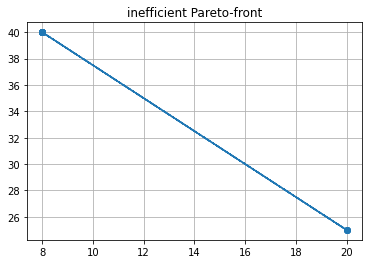

In [47]:
plt.plot(x1,x2,'o-.');
plt.title('inefficient Pareto-front');
plt.grid(True);